In [5]:
import pandas as pd
#import sklearn
from sklearn.model_selection import train_test_split

In [6]:
import pandas as pd

# Use the read_excel function for .xlsx files - remove the encoding parameter
df = pd.read_excel('./student_skills_languages_dataset_with_approval.xlsx', engine='openpyxl')
df.drop(columns=['Student_ID'], inplace=True)
df = df.applymap(lambda x: x.replace(' months', '') if isinstance(x, str) else x)

df



C:\Users\Aryan Hirlekar\AppData\Local\Temp\ipykernel_19212\178848214.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace(' months', '') if isinstance(x, str) else x)


,CGPA,Bachelors_Degree,Skills,Languages,Job_Experience,Duration_of_Internship_or_Job,Extra_Curricular,Research_Paper,Approval_Status
0,3.88,Robotics,"SQL, Artificial Intelligence, Web Development","R, C",Software Developer,13,Music Club,Yes,Accepted
1,2.47,Computer Engineering,"Artificial Intelligence, SQL, Computer Network...",Ruby,Hardware Engineer,4,"Debating Society, Student Government",Yes,Rejected
2,3.72,Mechanical Engineering,"DevOps, SQL, Operating Systems, Cloud Computing","C++, JavaScript",Systems Engineer,16,"Sports Club, Art Club, Student Government",Yes,Accepted
3,3.29,Software Engineering,"PostgreSQL, Operating Systems, Machine Learnin...",R,Systems Engineer,15,"Sports Club, Volunteering",Yes,Accepted
4,3.18,Mechanical Engineering,"Computer Networks, Cloud Computing, PostgreSQL...","C, JavaScript",Network Engineer,15,Music Club,Yes,Accepted
...,...,...,...,...,...,...,...,...,...
6995,3.74,Software Engineering,"Machine Learning, PostgreSQL, Operating System...","C++, C, Ruby",Research Assistant,8,Art Club,Yes,Accepted
6996,3.88,Civil Engineering,"DevOps, PostgreSQL, Operating Systems",C++,Network Engineer,19,"Coding Club, Music Club",Yes,Accepted
6997,4.00,Electrical Engineering,"SQL, DevOps, Data Structures & Algorithms (DSA)","C++, Ruby, Java",Software Developer,21,"Volunteering, Debating Society",No,Accepted
6998,3.09,Computer Engineering,"SQL, Artificial Intelligence, Operating System...","R, C++, C",Data Analyst,18,"Student Government, Debating Society, Voluntee...",No,Accepted


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, ConfusionMatrixDisplay


In [8]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd # Import pandas

# Assuming your data is in a DataFrame named 'df'
# If not, replace 'df' with the actual name of your DataFrame
data = pd.DataFrame(df)  # Create a copy of your DataFrame and assign it to 'data'

# Encode categorical columns like 'Bachelors_Degree' and 'Approval_Status'
label_encoder = LabelEncoder()

data['Bachelors_Degree'] = label_encoder.fit_transform(data['Bachelors_Degree'])
data['Approval_Status'] = label_encoder.fit_transform(data['Approval_Status'])

In [9]:
# One-hot encode the 'Skills' and 'Languages' columns
skills_dummies = data['Skills'].str.get_dummies(sep=', ')
languages_dummies = data['Languages'].str.get_dummies(sep=', ')

# Drop the original 'Skills' and 'Languages' columns and concatenate the new dummy columns
data_encoded = data.drop(columns=['Skills', 'Languages'])
data_encoded = pd.concat([data_encoded, skills_dummies, languages_dummies], axis=1)


In [10]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data_encoded.drop(columns=['Approval_Status'])
y = data_encoded['Approval_Status']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)








In [13]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [29]:
import pandas as pd

# Load the Excel file
file_path = 'student_skills_languages_dataset_with_approval.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows to understand its structure
print(df.head())

# Display column information to identify data types
print(df.info())
print(df['Skills'])


   Student_ID  CGPA        Bachelors_Degree  \
0        1001  3.88                Robotics   
1        1002  2.47    Computer Engineering   
2        1003  3.72  Mechanical Engineering   
3        1004  3.29    Software Engineering   
4        1005  3.18  Mechanical Engineering   

                                              Skills        Languages  \
0      SQL, Artificial Intelligence, Web Development             R, C   
1  Artificial Intelligence, SQL, Computer Network...             Ruby   
2    DevOps, SQL, Operating Systems, Cloud Computing  C++, JavaScript   
3  PostgreSQL, Operating Systems, Machine Learnin...                R   
4  Computer Networks, Cloud Computing, PostgreSQL...    C, JavaScript   

       Job_Experience Duration_of_Internship_or_Job  \
0  Software Developer                     13 months   
1   Hardware Engineer                      4 months   
2    Systems Engineer                     16 months   
3    Systems Engineer                     15 months   
4  

In [31]:
# Identify categorical columns (columns with string data)
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)
print(df.columns)


Categorical columns: Index(['Bachelors_Degree', 'Skills', 'Languages', 'Job_Experience',
       'Duration_of_Internship_or_Job', 'Extra_Curricular', 'Research_Paper',
       'Approval_Status'],
      dtype='object')
Index(['Student_ID', 'CGPA', 'Bachelors_Degree', 'Skills', 'Languages',
       'Job_Experience', 'Duration_of_Internship_or_Job', 'Extra_Curricular',
       'Research_Paper', 'Approval_Status'],
      dtype='object')


In [34]:
# Separate the features (X) and target variable (y)
target_column = 'Approval_Status'  # Replace this with the actual target column name if different
# X = df.drop(columns=[target_column])
# y = df[target_column]

# Apply One-Hot Encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Verify that all data is now numeric
print(X.head())


KeyError: "['Approval_Status'] not in index"

In [15]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Data Analyst'

In [133]:
y_pred = rf.predict(X_test)

In [134]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.905


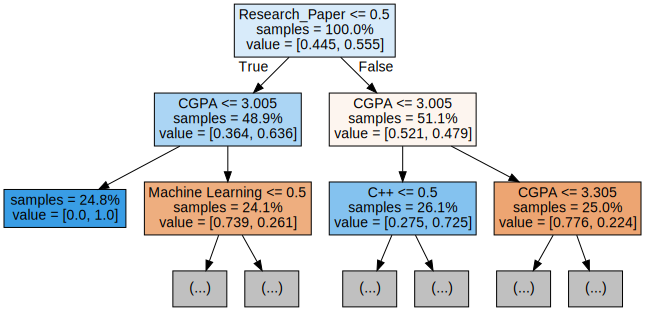

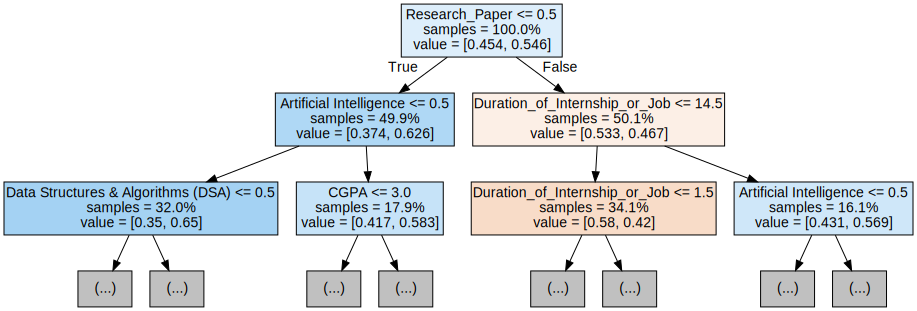

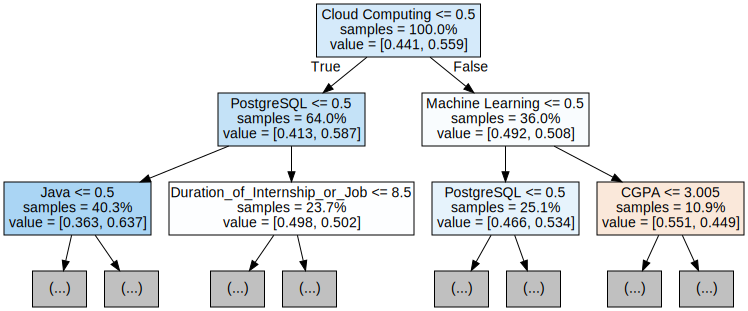

In [135]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [136]:
param_dist = {'n_estimators': randint(1,8),
              'max_depth': randint(1,6999)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e20a5d81b40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e20b0883130>})

In [137]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 3041, 'n_estimators': 7}


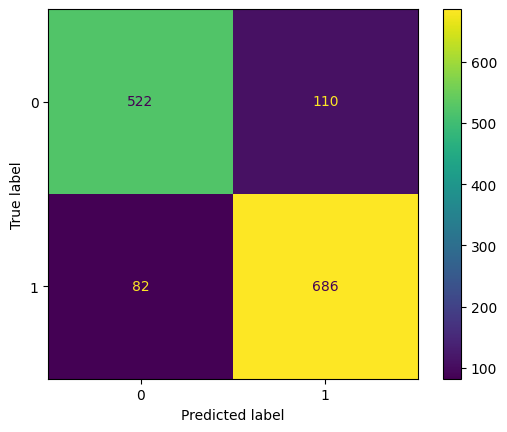

In [138]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [140]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7214285714285714
Precision: 0.7133182844243793
Recall: 0.8229166666666666


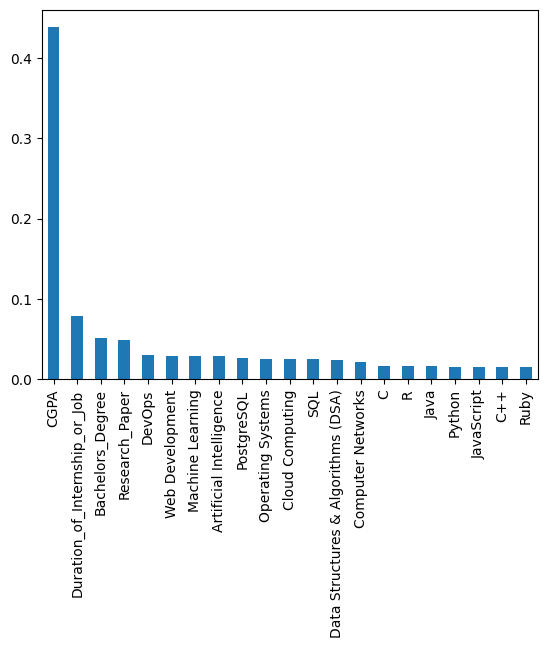

In [141]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();